In [1]:
import phylovelo as pv
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import re
import numpy as np
import pickle

/home/liyaru/miniconda3/envs/PhyloVelo/lib/python3.8/site-packages/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
tree_file = '/home/liyaru/DATA/8_transition/1_DATA/6_Nature_ReDeeM/figshare/clone/young2_HPC_tree.nwk'
phylo_tree, branch_colors = pv.ana_utils.loadtree(tree_file)
sampled_cells = [i.name for i in phylo_tree.get_terminals()]

# from Bio import Phylo
# tree = Phylo.read(tree_file, format='newick')

In [3]:
adata = sc.read_h5ad("/home/liyaru/DATA/8_transition/1_DATA/6_Nature_ReDeeM/young2/young2_velocity_RNAassay.h5ad")
print(adata)


AnnData object with n_obs × n_vars = 28943 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'seurat_clusters', 'Sig.HSC1', 'Sig.Prog1', 'Sig.EarlyE1', 'Sig.LateE1', 'Sig.ProMono1', 'Sig.Mono1', 'Sig.ncMono1', 'Sig.cDC1', 'Sig.pDC1', 'Sig.ProB1', 'Sig.PreB1', 'Sig.B1', 'Sig.Plasma1', 'Sig.T1', 'Sig.CTL1', 'Sig.NK1', 'STD.CellType', 'STD_Cat', 'STD_Cat2', 'Sample', 'MitoCoverage', 'ClonalGroup', 'ClonalGroup.Prob', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous'
    var: 'name'
    obsm: 'X_pca', 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [4]:
# filter samples
obs = adata.obs.copy()
obs = obs[obs['Sample'] == 'DN9_HSPC']
adata = adata[obs.index]

# rename cell
cells = adata.obs.index.tolist()
cells_new = [re.sub(r'2', '', s) for s in cells]
adata.obs_names  = cells_new

set1 = set(adata.obs.index.tolist())
set2 = set(sampled_cells) # filtered cells in tree
cells_intersect = list(set1 & set2)

adata = adata[cells_intersect]

In [5]:
adata

View of AnnData object with n_obs × n_vars = 7862 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'seurat_clusters', 'Sig.HSC1', 'Sig.Prog1', 'Sig.EarlyE1', 'Sig.LateE1', 'Sig.ProMono1', 'Sig.Mono1', 'Sig.ncMono1', 'Sig.cDC1', 'Sig.pDC1', 'Sig.ProB1', 'Sig.PreB1', 'Sig.B1', 'Sig.Plasma1', 'Sig.T1', 'Sig.CTL1', 'Sig.NK1', 'STD.CellType', 'STD_Cat', 'STD_Cat2', 'Sample', 'MitoCoverage', 'ClonalGroup', 'ClonalGroup.Prob', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous'
    var: 'name'
    obsm: 'X_pca', 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [6]:
adata.obs

,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,seurat_clusters,Sig.HSC1,...,Sample,MitoCoverage,ClonalGroup,ClonalGroup.Prob,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,nCount_ambiguous,nFeature_ambiguous
TGTTAGCAGGCCTTAG-,2548.0,1508,11938.0,5412,3496.0,1517,0.464124,0.535876,3,0.033051,...,DN9_HSPC,16.770354,12,0.917645,622.0,470,1169.0,764,137.0,119
CCTAATCGTTTAGCTC-,2106.0,1268,8103.0,3837,3670.0,1289,0.452290,0.547710,3,0.022024,...,DN9_HSPC,21.060837,18,0.884997,592.0,437,964.0,631,101.0,80
CTTAGTTTCTTTAAGG-,5219.0,2729,16957.0,8025,4759.0,2729,0.542527,0.457473,2,0.060795,...,DN9_HSPC,69.326513,2,0.914459,1640.0,1117,1999.0,1285,289.0,233
GTGTCCAAGTCATGCG-,6294.0,3027,19265.0,8855,4840.0,3017,0.581631,0.418369,2,0.035829,...,DN9_HSPC,83.596717,23,0.569023,2263.0,1335,2004.0,1277,317.0,264
GACTTGGTCAAGTGAG-,5502.0,2830,25395.0,11772,4834.0,2830,0.475838,0.524162,11,0.167808,...,DN9_HSPC,68.721166,9,1.000000,1802.0,1067,1984.0,1271,293.0,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCAATCTAGCAAGGGT-,8582.0,3520,37070.0,15160,5068.0,3017,0.483468,0.516532,16,-0.200358,...,DN9_HSPC,47.739212,7,0.913154,3434.0,1740,2705.0,1494,518.0,361
ATCCTGACATCCTAGA-,5670.0,2801,13143.0,6034,4851.0,2799,0.445420,0.554580,1,0.428001,...,DN9_HSPC,56.947915,16,0.999976,1609.0,968,2412.0,1505,281.0,236
TGTTGTAAGACAAAGT-,5142.0,2594,15370.0,7217,4721.0,2594,0.609613,0.390387,0,0.351605,...,DN9_HSPC,29.172612,15,0.420770,1426.0,872,2139.0,1335,251.0,216
GGGTTTGTCAGGATGA-,2594.0,1424,13603.0,6188,3511.0,1427,0.391564,0.608436,3,0.143412,...,DN9_HSPC,15.922204,15,0.528214,778.0,506,1083.0,687,116.0,102


In [7]:
# count = pd.DataFrame(adata.X.toarray(),columns=adata.var.index,index=adata.obs.index)
# count
count = adata.to_df()
non_zero_sum = (count != 0).sum() # check
non_zero_sum

MIR1302-2HG      0
FAM138A          0
OR4F5            0
AL627309.1      16
AL627309.3       0
              ... 
AC141272.1       0
AC023491.2       0
AC007325.1       0
AC007325.4     117
AC007325.2       6
Length: 36601, dtype: int64

In [8]:
count

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
TGTTAGCAGGCCTTAG-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCTAATCGTTTAGCTC-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTTAGTTTCTTTAAGG-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTGTCCAAGTCATGCG-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GACTTGGTCAAGTGAG-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCAATCTAGCAAGGGT-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCCTGACATCCTAGA-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGTTGTAAGACAAAGT-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGGTTTGTCAGGATGA-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sd = pv.scData(phylo_tree=phylo_tree,
               count= count)

In [10]:
sd.drop_duplicate_genes()
sd.normalize_filter(min_count=20)
sd.dimensionality_reduction(target='x_normed', method='umap')

In [11]:
depths = [len(phylo_tree.get_path(sd.phylo_tree.find_any(name=i))) for i in sd.x_normed.index]
depths

# # test
# for i in sd.x_normed.index[:50]:
#     print(len(phylo_tree.get_path(sd.phylo_tree.find_any(name=i))))

[22,
 11,
 19,
 25,
 10,
 13,
 24,
 11,
 20,
 27,
 34,
 10,
 30,
 16,
 26,
 10,
 13,
 14,
 27,
 11,
 11,
 25,
 17,
 29,
 26,
 16,
 14,
 14,
 17,
 13,
 19,
 9,
 27,
 14,
 27,
 12,
 26,
 43,
 31,
 17,
 13,
 11,
 25,
 24,
 31,
 64,
 40,
 10,
 15,
 22,
 54,
 10,
 27,
 25,
 14,
 17,
 11,
 18,
 38,
 28,
 12,
 26,
 17,
 23,
 13,
 12,
 22,
 24,
 23,
 13,
 26,
 15,
 11,
 50,
 40,
 25,
 18,
 18,
 21,
 55,
 19,
 14,
 16,
 15,
 14,
 16,
 21,
 27,
 16,
 22,
 11,
 9,
 30,
 14,
 15,
 17,
 16,
 17,
 10,
 16,
 16,
 16,
 17,
 17,
 10,
 23,
 18,
 23,
 32,
 11,
 13,
 23,
 18,
 23,
 24,
 12,
 37,
 20,
 37,
 24,
 13,
 25,
 13,
 11,
 17,
 12,
 25,
 15,
 13,
 18,
 23,
 27,
 13,
 39,
 23,
 21,
 22,
 24,
 23,
 11,
 17,
 13,
 13,
 18,
 19,
 15,
 50,
 14,
 24,
 12,
 32,
 25,
 21,
 19,
 10,
 11,
 33,
 64,
 28,
 12,
 13,
 18,
 62,
 17,
 33,
 15,
 12,
 9,
 17,
 18,
 11,
 18,
 18,
 42,
 21,
 18,
 11,
 10,
 19,
 10,
 12,
 16,
 23,
 19,
 19,
 8,
 14,
 21,
 55,
 16,
 12,
 16,
 14,
 28,
 17,
 35,
 30,
 18,
 8,
 20,
 16,


In [12]:
adata2 = sc.read_h5ad("../adata/redeem_young.h5ad")
print(adata2)
adata2.obs_names = [re.sub(r'2', '', s) for s in adata2.obs_names]

AnnData object with n_obs × n_vars = 9144 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'seurat_clusters', 'Sig.HSC1', 'Sig.Prog1', 'Sig.EarlyE1', 'Sig.LateE1', 'Sig.ProMono1', 'Sig.Mono1', 'Sig.ncMono1', 'Sig.cDC1', 'Sig.pDC1', 'Sig.ProB1', 'Sig.PreB1', 'Sig.B1', 'Sig.Plasma1', 'Sig.T1', 'Sig.CTL1', 'Sig.NK1', 'STD.CellType', 'STD_Cat', 'STD_Cat2', 'Sample', 'MitoCoverage', 'ClonalGroup', 'ClonalGroup.Prob', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'CellType', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'name', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'CellType_colors', 'STD.CellType_colors', 'neighbors', 'umap', 'velocity_gra

In [13]:
adata2 = adata2[count.index.tolist()]

In [14]:
xdr = pd.DataFrame(data=adata2.obsm['X_umap'], index=adata2.obs.index)

sel_cells = np.array([i.name for i in phylo_tree.get_terminals()])
sel_cells = sel_cells[np.isin(sel_cells, xdr.index)]
sel_xdr = xdr.loc[sel_cells]

sd.Xdr = xdr.loc[sd.x_normed.index]

In [15]:
sd.depths = depths

In [16]:
# save
with open('../data/phylovelo.pkl', 'wb') as file:
    pickle.dump(sd, file)

In [23]:
# all genes
pv.velocity_inference(sd, depths, cutoff=0.95, target='x_normed')

  0%|          | 0/17951 [00:00<?, ?it/s]

In [24]:
pv.velocity_embedding(sd, target='x_normed')

  0%|          | 0/7862 [00:00<?, ?it/s]

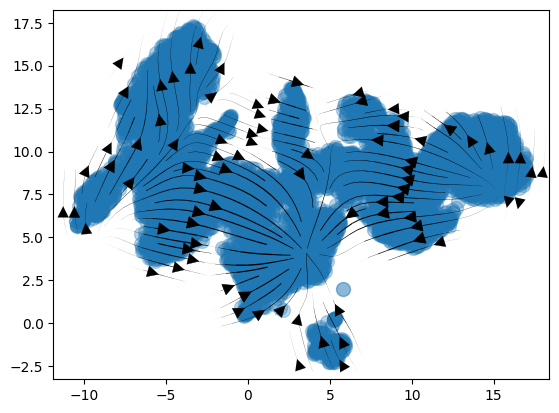

In [25]:
fig, ax = plt.subplots()
ax.scatter(sel_xdr.iloc[:,0], sel_xdr.iloc[:,1], 
           # c=c[sel_cells].apply(lambda x: adata.uns['leiden_sub_colors'][x]), 
           s=100, alpha=0.3)

ax = pv.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream', 
                      radius=0.8, lw_coef=60000, arrowsize=2)


In [26]:
celltype = adata2.obs.CellType.tolist()

celltype_palette = {
    'HSC':'#d62728',
    'MPP':'#ad494a',
    'CMP':'#1f77b4',
    'GMP':'#aec7e8',
    'MEP':'#ff7f0e',
    'MKP':'#ff9896',
    'EryP':'#ffbb78',
    'MDP':'#8c6d31',
    'Mono':'#c49c94',
    'LMPP':'#aa40fc',
    'CLP':'#c5b0d5',
    'ProB':'#98df8a'}
c = [celltype_palette[cell] for cell in celltype if cell in celltype_palette]

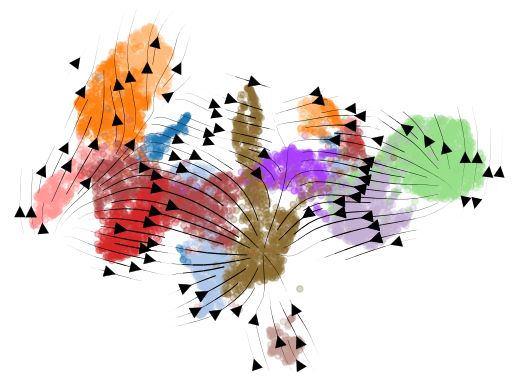

In [28]:
fig, ax = plt.subplots()
ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], c=c, 
           s=20, alpha=0.3)

ax = pv.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream', 
                      radius=0.8, lw_coef=60000, arrowsize=2)
plt.axis('off')
plt.savefig("../Figure/Phlovelo_new.svg")

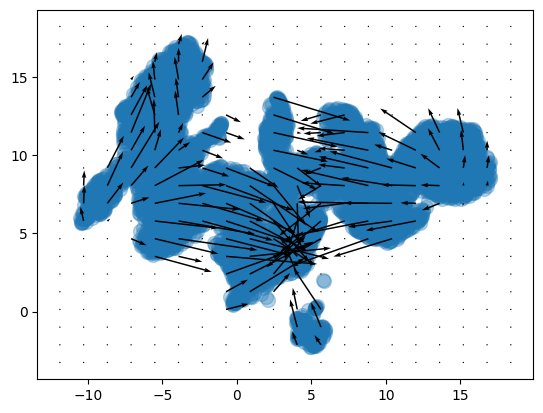

In [29]:
fig, ax = plt.subplots()
ax.scatter(sel_xdr.iloc[:,0], sel_xdr.iloc[:,1], 
           # c=c[sel_cells].apply(lambda x: adata.uns['leiden_sub_colors'][x]), 
           s=100, alpha=0.3)
ax = pv.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'grid', 
                      radius=0.8, lw_coef=100, arrowsize=2)

In [30]:
import pickle

# 使用pickle保存到文件
with open('phylovelo_new_umap.pkl', 'wb') as file:
    pickle.dump(sd, file)

In [2]:
import pickle
with open('phylovelo_new_umap.pkl', 'rb') as f:
	sd2 = pickle.load(f)

In [16]:
sd2.x_normed.columns

Index(['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'AL645608.6',
       'AL645608.2', 'SAMD11', 'NOC2L', 'KLHL17', 'ISG15',
       ...
       'MT-ND5', 'MT-ND6', 'MT-CYB', 'MAFIP', 'AC011043.1', 'AL354822.1',
       'AL592183.1', 'AC240274.1', 'AC004556.3', 'AC007325.4'],
      dtype='object', length=17951)

In [44]:
sd.velocity_embeded

array([[ 7.58134168e-06,  8.45056562e-07],
       [-7.13853778e-07,  2.84864321e-05],
       [ 5.15836888e-05, -1.96485523e-05],
       ...,
       [ 5.41654729e-05, -1.06322199e-05],
       [-4.29107083e-05,  5.76179311e-06],
       [ 5.04629435e-05, -1.23734903e-05]])

In [53]:
adata2 = adata2[sd.x_normed.index]
adata2.obsm['velocity_umap'] = sd.velocity_embeded
adata2.write_h5ad("../adata/phylovelo_umap.h5ad")